In [2]:
#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

# Feature Selection
1. Wrapper
2. Filter
3. Embedded

## 1. Wrapper : 모델링을 돌리면서 변수를 선택하는 방법

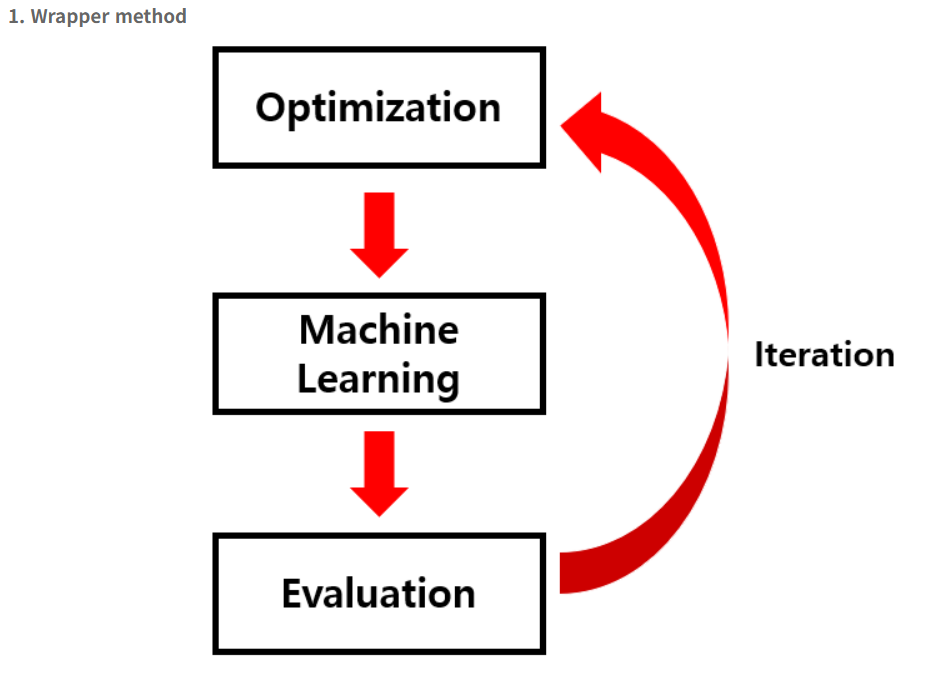

- Forward Selection(전진 선택) : 변수가 없는 상태로 시작하며 반복할 때마다 가장 중요한 변수를 추가하여 더 이상 성능의 향상이 없을 때까지 변수를 추가한다.
    - 변수를 추가할지 말지 경정하는 유의수준을 정한다
    - 가장 설명령기 좋은 변수라도 이 유의수준을 만족하지 못하면 선택되지 않고 알고리즘 종료한다

- Backward Elimination(후방 제거) : 모든 변수를 가지고 시작하며, 가장 덜 중요한 변수를 하나씩 제거하면서 모델의 성능을 향상시킨다. 더 이상 성능의 향상이 없을 때까지 반복한다.

- Stepwise Selection(단계별 선택): Foward Selection 과 Backward Elimination 을 결합하여 사용하는 방식으로, 모든  변수를 가지고 시작하여 가장 도움이 되지 않는 변수를 삭제하거나, 모델에서 빠져있는 변수 중에서 가장 중요한 변수를 추가하는 방법이다. 이와 같이 변수를 추가 또는 삭제를 반복한다. 반대로 아무것도 없는 모델에서 출발해 변수를 추가, 삭제를 반복할 수도 있다.

<https://todayisbetterthanyesterday.tistory.com/10>

<https://blog.naver.com/PostView.nhn?blogId=jaehong7719&logNo=221909615639>

---

- 사이킷런에 구현된 라이브러리 : Backward Elimination

>sklearn.feature_selection.RFE

- class sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
- 외부 추정기(예를 들어 선형 모델의 계수)가 특성에 가중치를 할당하는 경우, 재귀적 특성 제거 (Recursive Feature Elimination, RFE)의 목표는 점점 더 작은 특성 집합을 고려하여 특성을 선택하는 것입니다. 
- 먼저, 추정기는 초기 특성 집합에서 훈련되고 각 특성의 중요도는 특정한 속성 또는 호출 가능한 함수를 통해 얻어집니다. 
- 그런 다음, 현재 특성 집합에서 가장 중요하지 않은 특성들이 제거됩니다.
- 이 프로시저는 제거된 집합에 대해 재귀적으로 반복되며, 최종적으로 선택하려는 특성의 원하는 수에 도달할 때까지 계속 진행됩니다.

#### 매개변수:

- estimator: Estimator 인스턴스
- fit 메서드를 제공하는 지도 학습 추정기로, 특성 중요도에 관한 정보를 제공합니다 (예: coef_, feature_importances_).
- n_features_to_select: int 또는 float, 기본값=None선택할 특성의 수입니다. None이면 특성의 절반을 선택합니다. 정수이면 절대적으로 선택할 특성의 수입니다. 0과 1 사이의 부동 소수점이면 선택할 특성의 비율을 나타냅니다.
- step: int 또는 float, 기본값=1,1보다 크거나 같으면, 각 반복에서 제거할 특성의 (정수) 개수에 해당합니다. (0.0, 1.0) 범위 내에 있다면, 각 반복에서 제거할 특성의 비율(내림)에 해당합니다.
- verbose: int, 기본값=0 , 출력의 상세정도를 제어합니다.
- importance_getter: str 또는 callable, 기본값='auto','auto'인 경우, 추정기의 coef_ 또는 feature_importances_ 속성을 통해 특성 중요도를 사용합니다.
- 문자열을 사용하여 특성 중요도를 추출하는 속성 이름/경로를 지정할 수도 있습니다 (attrgetter로 구현됨). 예를 들어, TransformedTargetRegressor의 경우 regressor_.coef_ 또는 class:~sklearn.pipeline.Pipeline의 경우 named_steps.clf.feature_importances_를 지정할 수 있습니다. callable인 경우, 기본 특성 중요도 getter를 재정의합니다. callable은 훈련된 추정기와 함께 전달되며 각 특성의 중요도를 반환해야 합니다.

#### 속성:

- classes_: shape이 (n_classes,)인 ndarray, 추정기가 분류기인 경우 사용 가능한 클래스 레이블입니다.
- estimator_: Estimator 인스턴스, 특성 선택에 사용된 훈련된 추정기입니다.
- n_features_: int, 선택된 특성의 수입니다.
- n_features_in_: int, fit 중에 본 특성의 수입니다. fit할 때 기본 추정기가 이러한 속성을 노출하는 경우에만 정의됩니다.
- feature_names_in_: shape이 (n_features_in_,)인 ndarray, fit 중에 본 특성의 이름입니다. X가 모두 문자열인 특성 이름을 가질 때만 정의됩니다. (version 1.0에서 추가)
- ranking_: shape이 (n_features,)인 ndarray, 특성 순위입니다. ranking_[i]는 i번째 특성의 순위 위치에 해당합니다. 선택된 (즉, 추정상 최상의) 특성은 순위 1로 할당됩니다.
- support_: shape이 (n_features,)인 ndarray, 선택된 특성의 마스크입니다.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df=pd.read_csv('../해커톤/new_data.csv',encoding='euc-kr',index_col=0)
X=df.drop(['달러원종가','target'], axis=1)
y=df[['달러원종가']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

RFE = RFE(model, n_features_to_select=5)
X_train_RFE = RFE.fit_transforfm(X_train,y_train)
X_test_RFE = RFE.transform(X_test)

AttributeError: 'RFE' object has no attribute 'fit_transforfm'

In [26]:
X_train_RFE

array([[1164.07  ,    2.88  ,    6.8285,    1.98  ,    2.38  ],
       [1151.    ,    2.88  ,    6.8268,    1.98  ,    2.34  ],
       [1140.2   ,    2.88  ,    6.8278,    1.96  ,    2.37  ],
       ...,
       [1210.43  ,    1.49  ,    7.096 ,    1.53  ,    1.54  ],
       [1213.65  ,    1.49  ,    7.1512,    1.53  ,    1.54  ],
       [1212.74  ,    1.49  ,    7.1623,    1.53  ,    1.55  ]])

In [27]:
RFE.n_features_in_

10

In [28]:
RFE.feature_names_in_

array(['달러원시가', 'CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로인덱스', '콜금리',
       '코스피종가', 'BIR'], dtype=object)

In [6]:
X_train[RFE.ranking_ ==1]

NameError: name 'RFE' is not defined

---

## 2. Filter

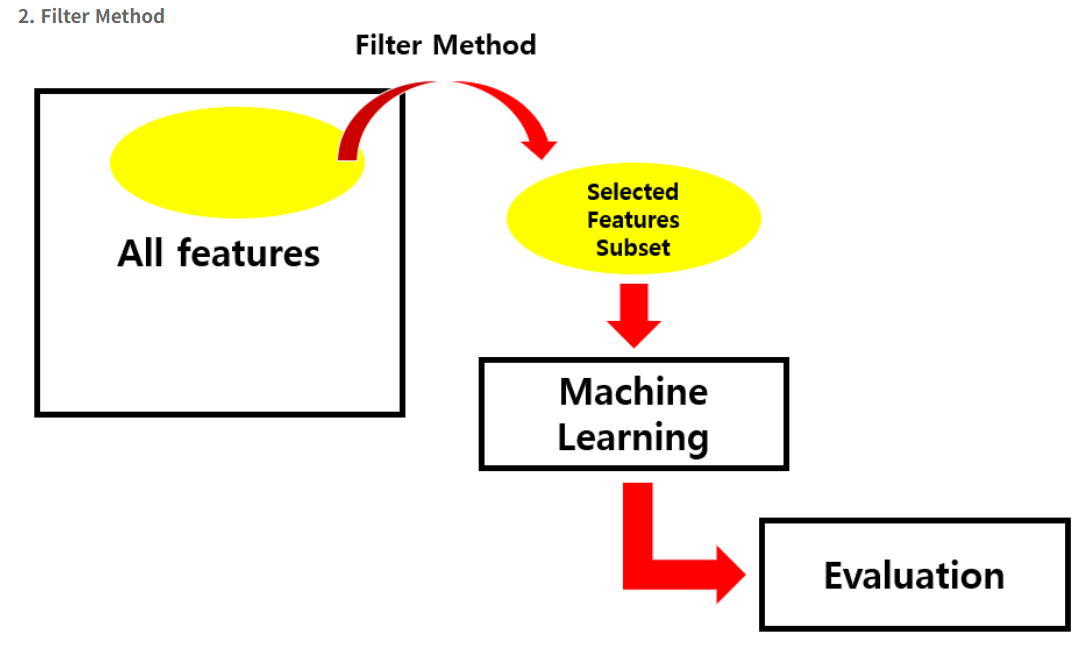

- 통계기법 사용하여 변수를 선택하는 방법
- 전처리단에서 주로 사용할 만 하며 통계기법을 사용하여 상관관계가 높은 변수나, 성능이 높은 변수를 추출하는 방법

> sklearn.feature_selection.SelectKBest

- class sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10)
- k개의 최고 점수에 따라 특징을 선택합니다.


#### 매개변수:

- score_func: callable, 기본값=f_classif, 두 개의 배열 X와 y를 입력으로 받고 점수(scores)와 p-값(p-values)으로 이루어진 두 배열을 반환하거나 점수로 이루어진 단일 배열을 반환하는 함수입니다. 기본 함수는 주로 분류 작업에 사용됩니다.
    - f_classif: 분류 작업에 사용됩니다. ANOVA(F-통계량)를 기반으로 한 특징 선택 함수입니다.
    - mutual_info_classif: 분류 작업에 사용됩니다. 두 변수 간의 상호 정보량(Mutual Information)을 기반으로 한 특징 선택 함수입니다.
    - chi2: 분류 작업에 사용됩니다. 카이제곱 검정을 기반으로 한 특징 선택 함수입니다.
    - f_regression: 회귀 작업에 사용됩니다. ANOVA(F-통계량)를 기반으로 한 특징 선택 함수입니다.
    - mutual_info_regression: 회귀 작업에 사용됩니다. 두 변수 간의 상호 정보량(Mutual Information)을 기반으로 한 특징 선택 함수입니다.
    - SelectKBest.score_func: 사용자 정의 함수를 지정할 수도 있습니다. 이 경우, 자신만의 특징 선택 함수를 작성하고 score_func로 전달할 수 있습니다.
    - k: int 또는 "all", 기본값=10, 선택할 상위 특성의 수입니다. "all" 옵션은 선택을 우회하며 매개변수 검색에 사용됩니다.

#### 속성:

- scores: shape이 (n_features,)인 배열과 유사한 객체, 특성의 점수입니다.
- pvalues: shape이 (n_features,)인 배열과 유사한 객체, 특성 점수의 p-값입니다. score_func이 점수만 반환하는 경우 None입니다.
- n_features_in_: int, fit 중에 본 특성의 수입니다. (version 0.24에서 추가됨)
- feature_names_in_: shape이 (n_features_in_,)인 ndarray, fit 중에 본 특성의 이름입니다. X가 모두 문자열인 특성 이름을 가질 때만 정의됩니다. (version 1.0에서 추가됨)

#### 매소드:

- fit(X, y): 주어진 데이터 X와 레이블 y에 대해 score_func 함수를 실행하고 가장 적합한 특성을 선택합니다.
- fit_transform(X, [y]): 데이터에 모델을 피팅하고 동시에 변환합니다. 선택된 특성만 반환됩니다.
- get_feature_names_out([input_features]): 선택된 특성에 대한 이름을 반환합니다. 선택된 특성의 인덱스에 따라 원본 특성의 이름을 마스킹하여 반환할 수 있습니다.
- get_metadata_routing(): 이 객체의 메타데이터 라우팅 정보를 반환합니다.
- get_params([deep]): 모델의 하이퍼파라미터를 얻습니다. deep=True로 설정하면 중첩된 파라미터도 얻을 수 있습니다.
- get_support([indices]): 선택된 특성에 대한 마스크 또는 정수 인덱스를 반환합니다. 이를 사용하여 선택된 특성의 인덱스를 확인할 수 있습니다.
- inverse_transform(X): 선택된 특성을 다시 원래 데이터 공간으로 변환합니다.
- set_output(*[, transform]): 출력 컨테이너를 설정합니다.
- set_params(**params): 모델의 하이퍼파라미터를 설정합니다.
- transform(X): 데이터 X를 선택된 특성으로 축소합니다.

In [11]:
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=5)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((2322, 5), (996, 5))

In [15]:
selector.feature_names_in_

array(['달러원시가', 'CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로인덱스', '콜금리',
       '코스피종가', 'BIR'], dtype=object)

In [16]:
selector.get_support()


array([ True, False,  True,  True, False, False,  True, False, False,
        True])

In [17]:
selected_mask =selector.get_support()
selected_names = X.columns[selected_mask]
unselected_names = X.columns[~selected_mask]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['달러원시가', 'WTI가', '달러위안화', '유로인덱스', 'BIR'], dtype='object')
Unselected names:  Index(['CD91', '달러엔', '달러인덱스', '콜금리', '코스피종가'], dtype='object')


---

## 3. Embedded
- Lasso, Ridge, Elastic Net 등 내장함수 사용하여 변수를 선택하는 방법
- Embedded method는 모델 자체에 Feature selection 기능이 추가되어 있는 경우

>from sklearn.feature_selection import SelectFromModel

- class sklearn.feature_selection.SelectFromModel(estimator, *, threshold=None, prefit=False, norm_order=1, max_features=None, importance_getter='auto')

#### 매개변수:

- estimator: 객체변환기가 구축되는 기본 추정기입니다. prefit 매개변수가 True로 설정된 경우에는 피팅된(학습된) 추정기일 수도 있고, 그렇지 않으면 아직 피팅되지 않은 추정기일 수 있습니다. 추정기는 fitting 후 feature_importances_ 또는 coef_ 속성을 가져야 합니다. 그렇지 않으면 importance_getter 매개변수를 사용해야 합니다.
- threshold: str 또는 float, 기본값=None특성 선택에 사용할 임계값입니다. 절대적인 중요도 값이 이 값보다 크거나 같은 특성은 유지되고, 나머지는 삭제됩니다. "median" (또는 "mean")이면 임계값은 특성 중요도의 중간값 (또는 평균값)입니다. 스케일링 팩터 (예: "1.25*mean")도 사용할 수 있습니다. None이고 추정기의 penalty 매개변수가 l1로 설정된 경우 (명시적 또는 암시적으로, 예: Lasso), 임계값은 1e-5로 설정됩니다. 그렇지 않으면 기본값으로 "mean"이 사용됩니다.
- prefit: bool, 기본값=False, 생성자에 직접 전달할 사전 학습된 모델이 예상되는지 여부입니다. True이면 추정기는 이미 피팅된 상태여야 합니다. False이면 추정기는 fit 및 partial_fit을 호출하여 피팅 및 업데이트됩니다.
- norm_order: 0이 아닌 int, inf, -inf, 기본값=1
- coef_ 추정기의 차원이 2인 경우 임계값 아래의 계수 벡터를 필터링하는 데 사용되는 노름(norm)의 순서입니다.
- max_features: int, callable 또는 None, 기본값=None, 선택할 최대 특성 수입니다. 정수인 경우, 허용할 최대 특성 수를 지정합니다. callable인 경우, max_features(X)의 출력을 사용하여 허용된 최대 특성 수를 계산하는 방법을 지정합니다. None이면 모든 특성을 유지합니다. max_features에 기반한 선택만을 원하는 경우, threshold를 -np.inf로 설정하십시오. (version 0.20에서 추가, version 1.1에서 callable을 지원합니다.)
- importance_getter: str 또는 callable, 기본값='auto', 'auto'인 경우, 추정기의 coef_ 속성 또는 feature_importances_ 속성을 통해 특성 중요도를 사용합니다.
문자열을 사용하여 특성 중요도를 추출하는 속성 이름/경로를 지정할 수도 있습니다. (version 0.24에서 추가)

#### 속성:

- estimator_: 추정기, 변환기가 구축된 기본 추정기입니다. fit이 호출된 경우에만 이 속성이 존재합니다.
prefit=True이면 estimator의 깊은 복사본입니다.
prefit=False이면 estimator의 복제본이며 fit 또는 partial_fit에 전달된 데이터에 맞게 피팅됩니다.
- n_features_in_: int, fit 중에 관찰된 특성 수입니다. (version 0.24에서 추가)
- max_features_: int 또는 callable, fit 중에 계산된 최대 특성 수입니다. max_features가 정수이면 max_features_ = max_features입니다. max_features가 callable이면 max_features_ = max_features(X)입니다. (version 1.1에서 추가)
- feature_names_in_: shape이 (n_features_in_,)인 ndarray, fit 중에 관찰된 특성의 이름입니다. X의 특성 이름이 모두 문자열인 경우에만 정의됩니다. (version 1.0에서 추가)
threshold_: float, 특성 선택에 사용된 임계값입니다.

#### 매소드:

- fit(X, y):SelectFromModel 메타-트랜스포머를 피팅합니다.
- fit_transform(X, y):데이터에 맞추고 변환합니다.
- get_feature_names_out(input_features=None):선택된 특성에 따라 특성 이름을 마스킹합니다.
- get_metadata_routing():이 객체의 메타데이터 라우팅을 가져옵니다.
- get_params(deep=True):이 추정기의 매개변수를 가져옵니다.
- get_support(indices=False):선택된 특성의 마스크 또는 정수 인덱스를 가져옵니다.
- inverse_transform(X):변환 작업을 역으로 수행합니다.
- partial_fit(X, y=None):SelectFromModel 메타-트랜스포머를 한 번만 피팅합니다.
- set_output(transform=True):출력 컨테이너를 설정합니다.
- set_params(**params):이 추정기의 매개변수를 설정합니다.
- transform(X):X를 선택된 특성으로 줄입니다.

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=RandomForestRegressor(), threshold=0.1).fit(X_train, y_train)
rf = selector.get_support()
count = np.count_nonzero(rf)
count

1

In [48]:
selector.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False])

In [49]:
selected_mask2=selector.get_support()

In [50]:
selected_names = X.columns[selected_mask2]
unselected_names = X.columns[~selected_mask2]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['달러원시가'], dtype='object')
Unselected names:  Index(['CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로인덱스', '콜금리', '코스피종가',
       'BIR'],
      dtype='object')
